In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hostnames = []
dataset = []
df = None

In [3]:
def set_hostnames(number_of_hosts : int) -> None:
    
    SO_prefix = ["L"]*40 + ["S"]*30 + ["A"]*20 + ["H"]*10 #Linux:40% Solaris:30% AIX:20% HP-UX:10%
    enviroment = ["D"]*10 + ["I"]*10 + ["T"]*25 + ["S"]*25 + ["P"]*30 #Development:10% Integration:10% Testing:25% Staging:25% Production:30%
    countries = ["NOR"]*6 + ["FRA"]*9 + ["ITA"]*16 + ["ESP"]*16 + ["DEU"]*23 + ["IRL"]*30 #Norway:6% France:9% Italy:16% Spain:16% Germany:23% Ireland:30%
    grupo_alpha = []
    
    for i in range(number_of_hosts):
        country = random.choice(countries)
        hostname = random.choice(SO_prefix) + random.choice(enviroment)
        hostname += country
        grupo_alpha.append(hostname)
        hostname +=str(grupo_alpha.count(hostname)).zfill(3)
        hostnames.append(hostname)

In [4]:
def get_os(code_SO: str)-> str:
    
    if code_SO.startswith("L"):
        return 'Linux'
    elif code_SO.startswith("S"):
        return 'Solaris'
    elif code_SO.startswith("A"):
        return 'AIX'
    elif code_SO.startswith("H"):
        return 'HP-UX'
    else:
        return 'unknown value'

In [5]:
def get_enviroment(code_SO: str)-> str:
    
    if code_SO[1] == 'D':
        return 'Development'
    elif code_SO[1] =='I':
        return 'Integration'
    elif code_SO[1] == 'T':
        return 'Testing'    
    elif code_SO[1] == 'S':
        return 'Staging'
    elif code_SO[1] == 'P':
        return 'Production'
    else:
        return 'unknown value'

In [6]:
def get_country(code_SO: str)-> str:
    
    if code_SO[2:5] == 'NOR':
        return 'Norway'
    elif code_SO[2:5] == 'FRA':
        return 'France'
    elif code_SO[2:5] == 'ITA':
        return 'Italy'
    elif code_SO[2:5] == 'ESP':
        return 'Spain'
    elif code_SO[2:5] == 'DEU':
        return 'Germany'
    elif code_SO[2:5] == 'IRL':
        return 'Ireland'

In [7]:
def set_dataframe(numero: int) -> None:
    
    global df
    
    set_hostnames(numero)
    
    for code_SO in hostnames: 
        dataset.append({
            'code_SO': code_SO,
            'SO_prefix': get_os(code_SO),
            'environment': get_enviroment(code_SO),  
            'country': get_country(code_SO), 
            'numero': int(code_SO[-2:])
        })
    df = pd.DataFrame(dataset)

In [8]:
set_dataframe(1500)


In [9]:
df

,code_SO,SO_prefix,environment,country,numero
0,APFRA001,AIX,Production,France,1
1,ASDEU001,AIX,Staging,Germany,1
2,APIRL001,AIX,Production,Ireland,1
3,STDEU001,Solaris,Testing,Germany,1
4,HIIRL001,HP-UX,Integration,Ireland,1
...,...,...,...,...,...
1495,SPFRA016,Solaris,Production,France,16
1496,SPESP020,Solaris,Production,Spain,20
1497,LPDEU045,Linux,Production,Germany,45
1498,SSESP018,Solaris,Staging,Spain,18


In [10]:
df.to_csv('hosts.csv', header=True, index=False)


In [11]:
print('DataFrame guardado correctamente en hosts.csv')

DataFrame guardado correctamente en hosts.csv


In [12]:
hosts_df = pd.read_csv('hosts.csv')

hosts_df.head()

,code_SO,SO_prefix,environment,country,numero
0,APFRA001,AIX,Production,France,1
1,ASDEU001,AIX,Staging,Germany,1
2,APIRL001,AIX,Production,Ireland,1
3,STDEU001,Solaris,Testing,Germany,1
4,HIIRL001,HP-UX,Integration,Ireland,1


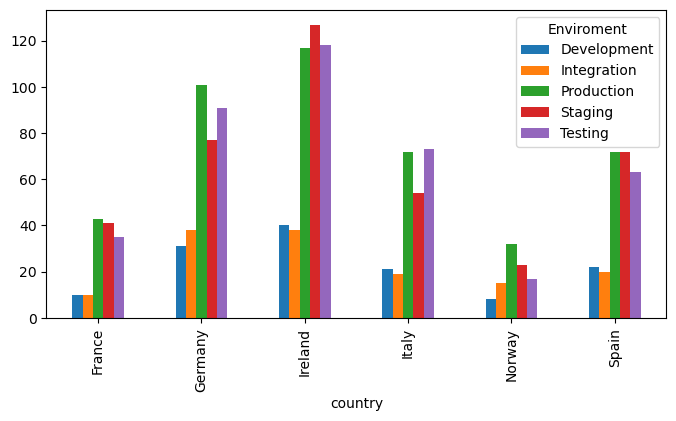

In [13]:
grouped_data = hosts_df.groupby(['country', 'environment']).size().unstack()


grouped_data.plot(kind='bar', stacked=False, figsize=(8, 4))
plt.title('')
plt.xlabel('country')
plt.ylabel('')
plt.legend(title='Enviroment')
plt.show()

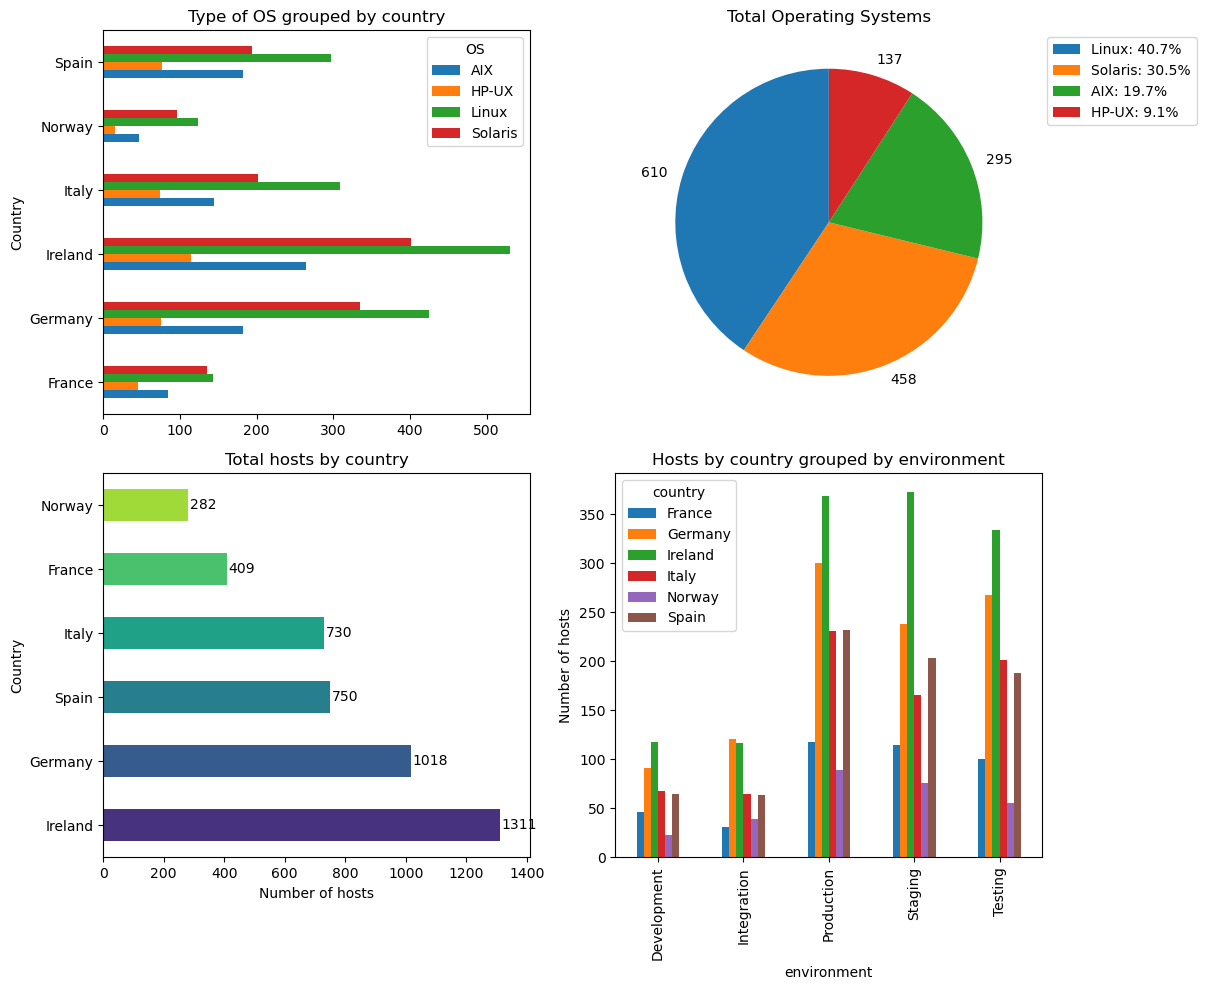

In [14]:
# los datos estan disponibles
set_dataframe(1500)

# Configuro la figura con 2 filas y 2 columnas
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico 1: Type of OS grouped by country
grouped_data_os = df.groupby(['country', 'SO_prefix']).size().unstack()
grouped_data_os.plot(kind='barh', stacked=False, ax=axs[0, 0])
axs[0, 0].set_title('Type of OS grouped by country')
axs[0, 0].set_ylabel('Country')
axs[0, 0].legend(title='OS')

# Gráfico 2: Total Operating Systems
total_os = hosts_df['SO_prefix'].value_counts()
axs[0, 1].pie(total_os, labels=total_os, autopct='',pctdistance=0.85, startangle=90)
axs[0, 1].set_title('Total Operating Systems')
legend_labels = [f'{os}: {percentage:.1f}%' for os, percentage in zip(total_os.index, total_os / len(hosts_df) * 100)]
axs[0, 1].legend(labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')
total_percentage = len(hosts_df) / len(total_os) * 100

# Gráfico 3: Total hosts by country
total_hosts_by_country = df['country'].value_counts()
total_hosts_by_country.plot(kind='barh', color=sns.color_palette("viridis"), ax=axs[1, 0])
axs[1, 0].set_title('Total hosts by country')
axs[1, 0].set_xlabel('Number of hosts')
axs[1, 0].set_ylabel('Country')
axs[1,0].set_xlim(0, max(total_hosts_by_country) + 100)
for i, value in enumerate(total_hosts_by_country.values):
    axs[1, 0].text(value + 5, i, str(value), va='center')

# Gráfico 4: Hosts by country grouped by environment
grouped_data_env = df.groupby(['environment', 'country']).size().unstack()
grouped_data_env.plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Hosts by country grouped by environment')
axs[1, 1].set_ylabel('Number of hosts')
axs[1, 1].legend(title='country')

# Ajusto el diseño para evitar posibles superposiciones
plt.tight_layout()

# Y finalmente muestro la figura completa con 4 gráficos en una malla de 2 filas y 2 columnas
plt.show()